In [33]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Enable inline plots
%matplotlib inline

In [34]:
# Load the dataset
data = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

print(data.tail())
print(data.info())


Dataset Preview:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.

In [35]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Numerical Columns:")
print(data[numerical_columns].head())

# Calculate basic statistics
stats = data[numerical_columns].describe().T
stats['mean'] = data[numerical_columns].mean()
stats['median'] = data[numerical_columns].median()
stats['mode'] = data[numerical_columns].mode().iloc[0]
stats['std_dev'] = data[numerical_columns].std()

print("\nBasic Statistics for Numerical Columns:")
print(stats)


Numerical Columns:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

Basic Statistics for Numerical Columns:
                   count          mean           std         min          25%  \
Volume             450.0      5.066667      4.231602    1.000000     3.000000   
Avg Price          450.0  10453.433333  18079.904840  290.000000   465.000000   
Total Sales Value  450.0  33812.835556  50535.074173  400.000000  2700.000000   
Discount Rate (

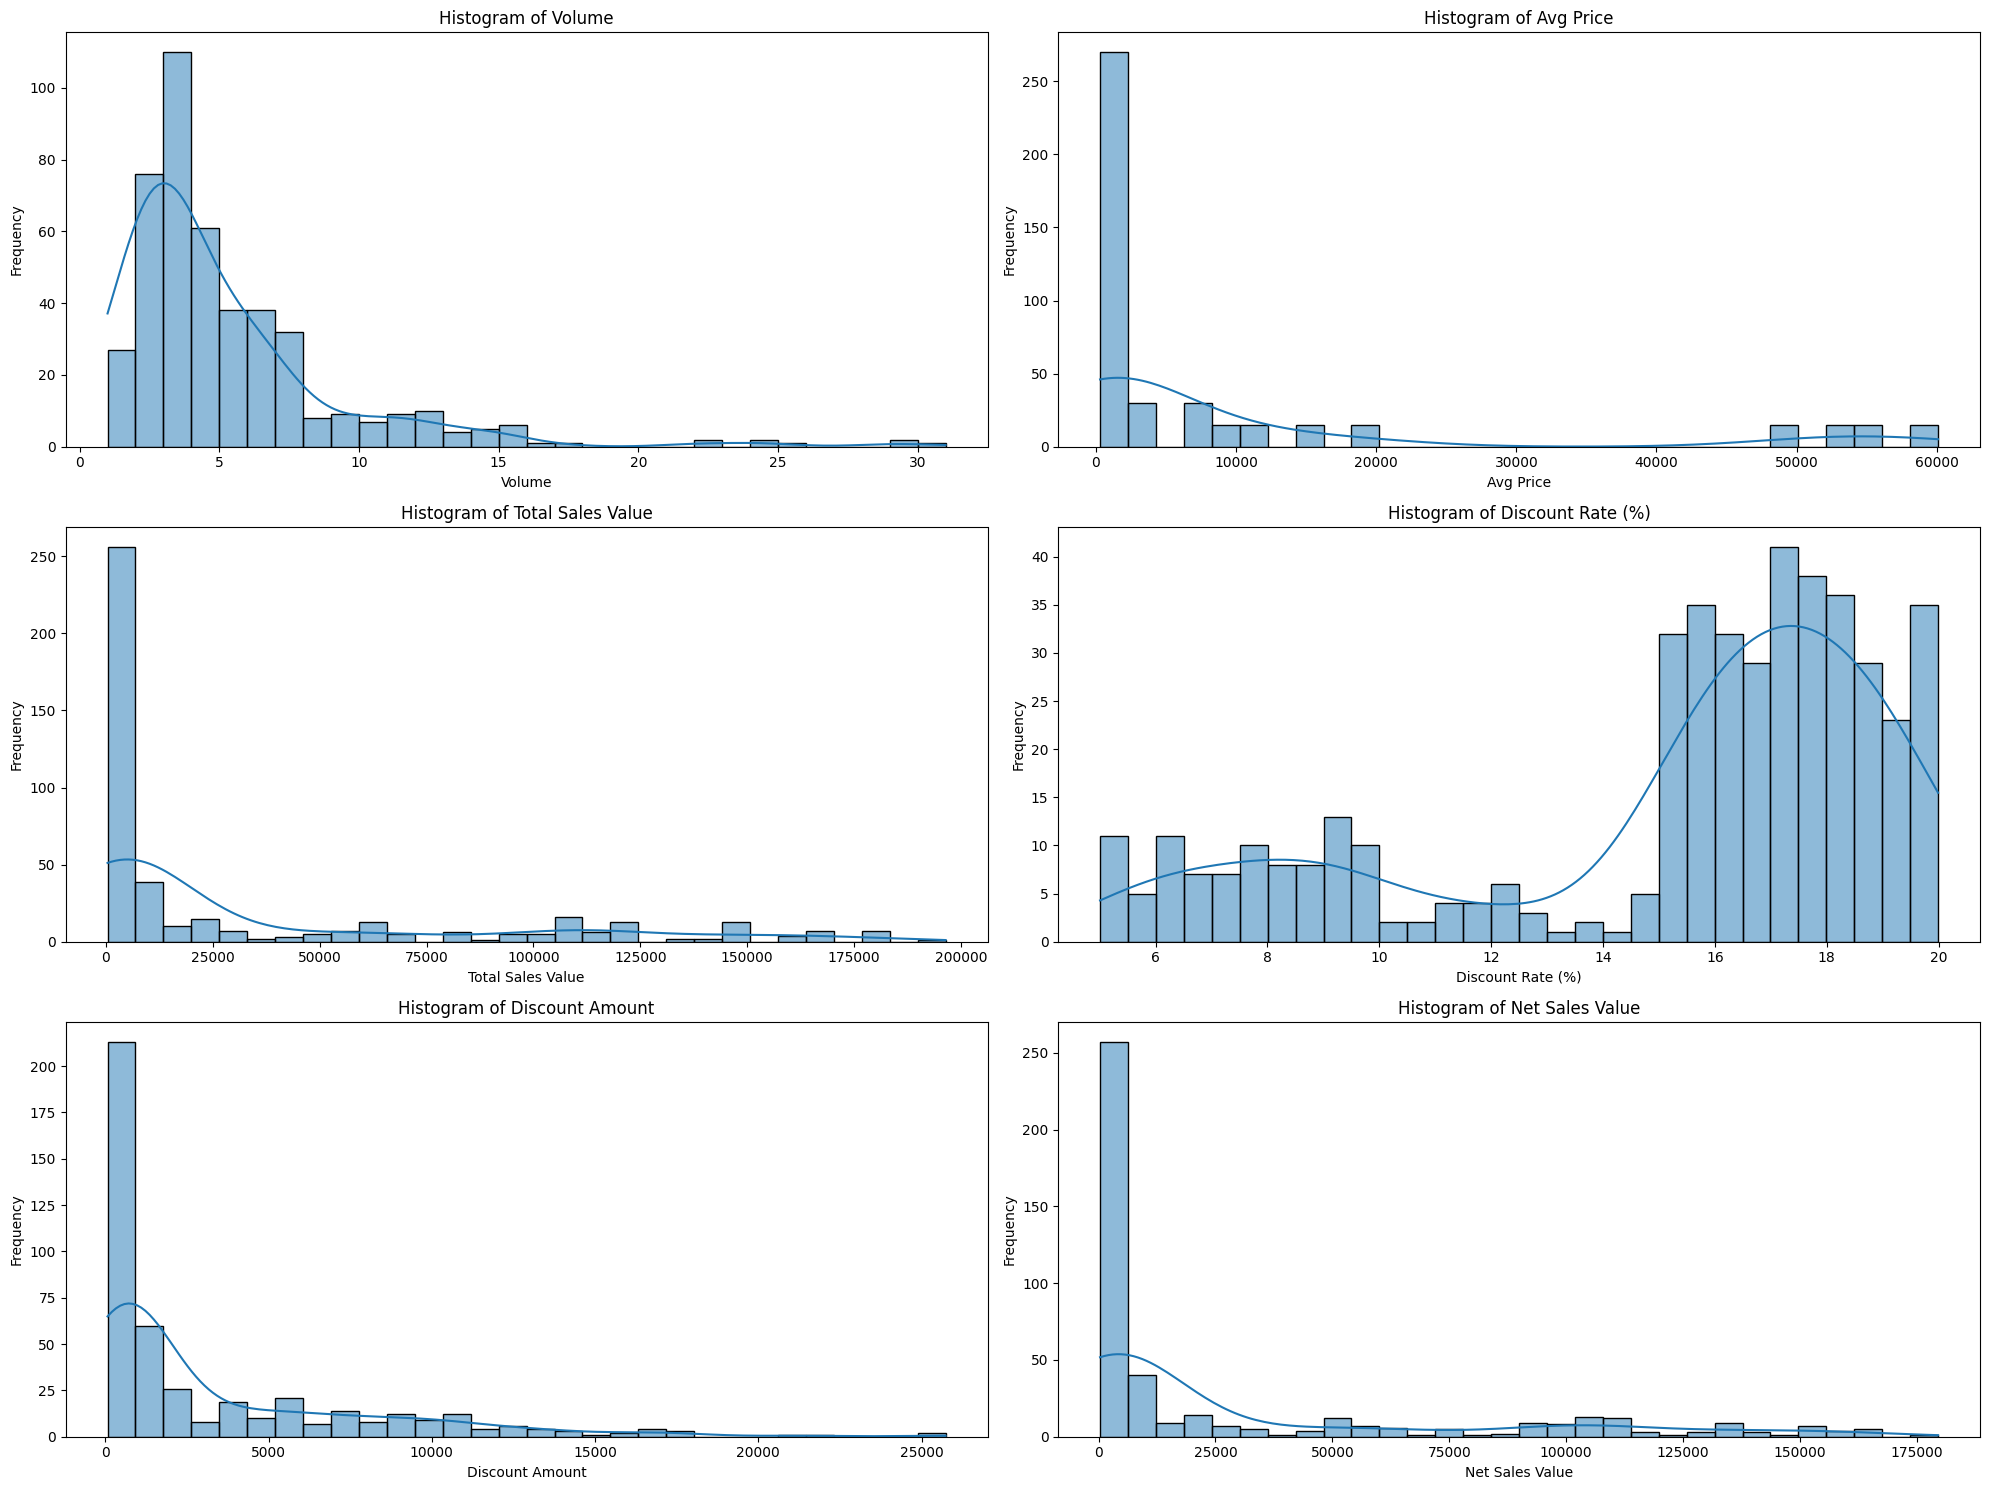

In [36]:
# Ploting histograms for numerical columns
import math

# Number of numerical columns
n_cols = len(numerical_columns)

# Set up the grid: 2 columns
n_rows = math.ceil(n_cols / 2)  # Calculate rows required
fig, axes = plt.subplots(n_rows, 2, figsize=(20, 5 * n_rows))  # Adjust figure size

# Flatten the axes for easy indexing
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing
plt.show()



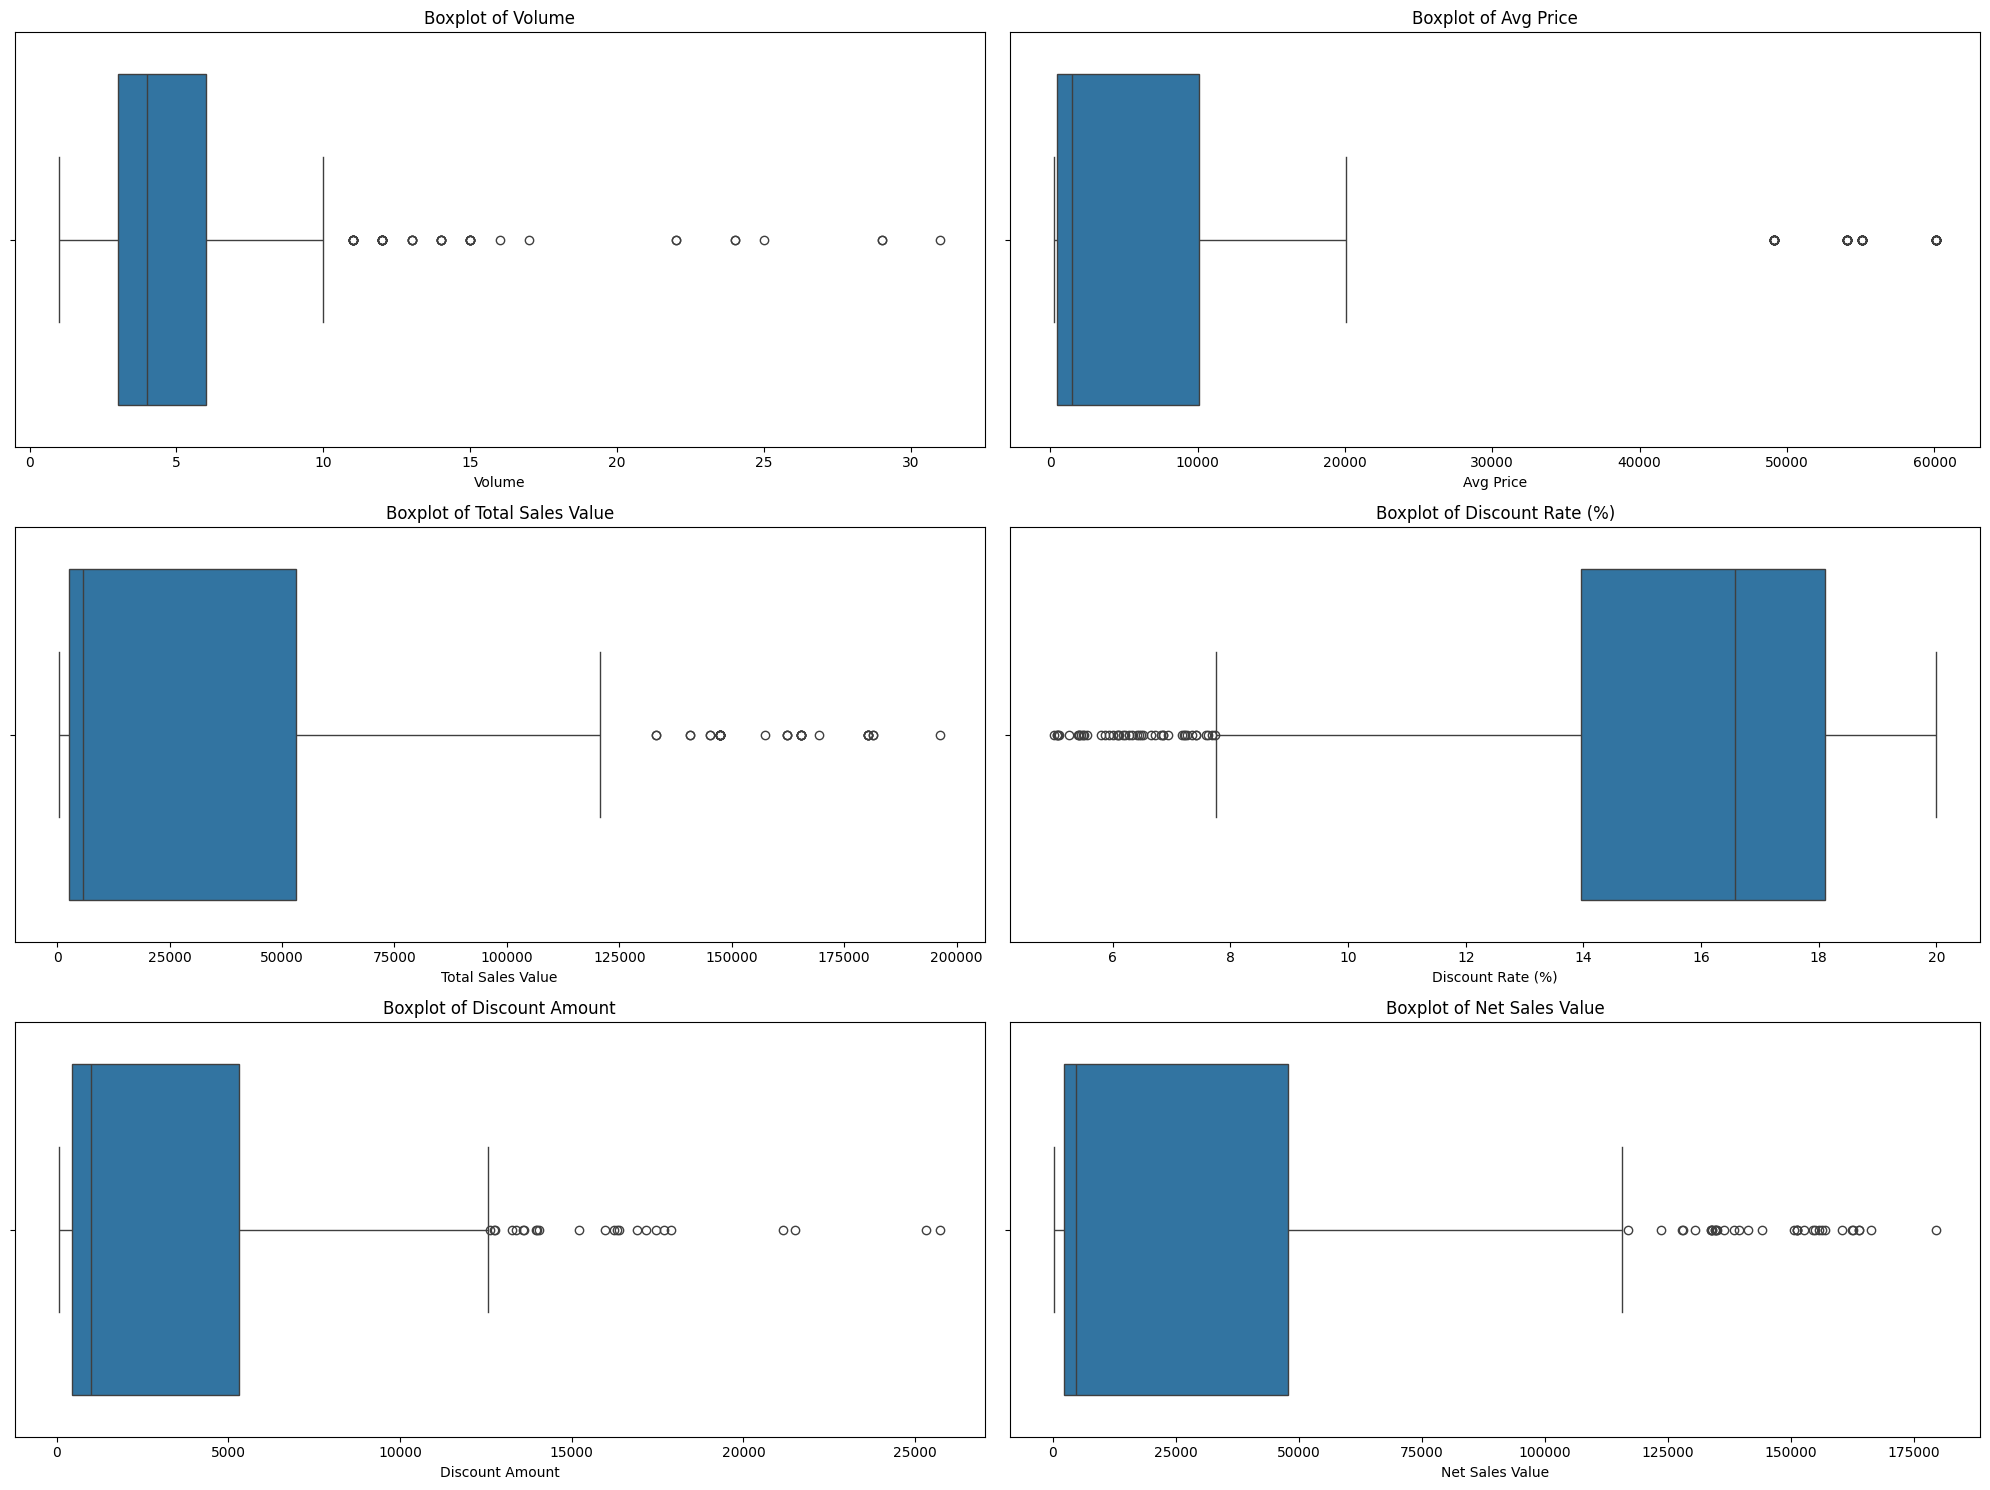

In [37]:
# Calculate rows and columns for subplots
n_cols = len(numerical_columns)  # Total number of columns
n_rows = math.ceil(n_cols / 2)  # Rows needed for 2 columns per row

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(20, 5 * n_rows))  # (rows, columns), adjust figure size

# Step 3: Flatten the axes for easy indexing
axes = axes.flatten()

# Step 4: Loop through numerical columns and plot boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])  # Plot boxplot
    axes[i].set_title(f"Boxplot of {col}")  # Add title

# Step 5: Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplot slots

# Step 6: Adjust layout and show the plot
plt.tight_layout()  # Prevent overlap
plt.show()

Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


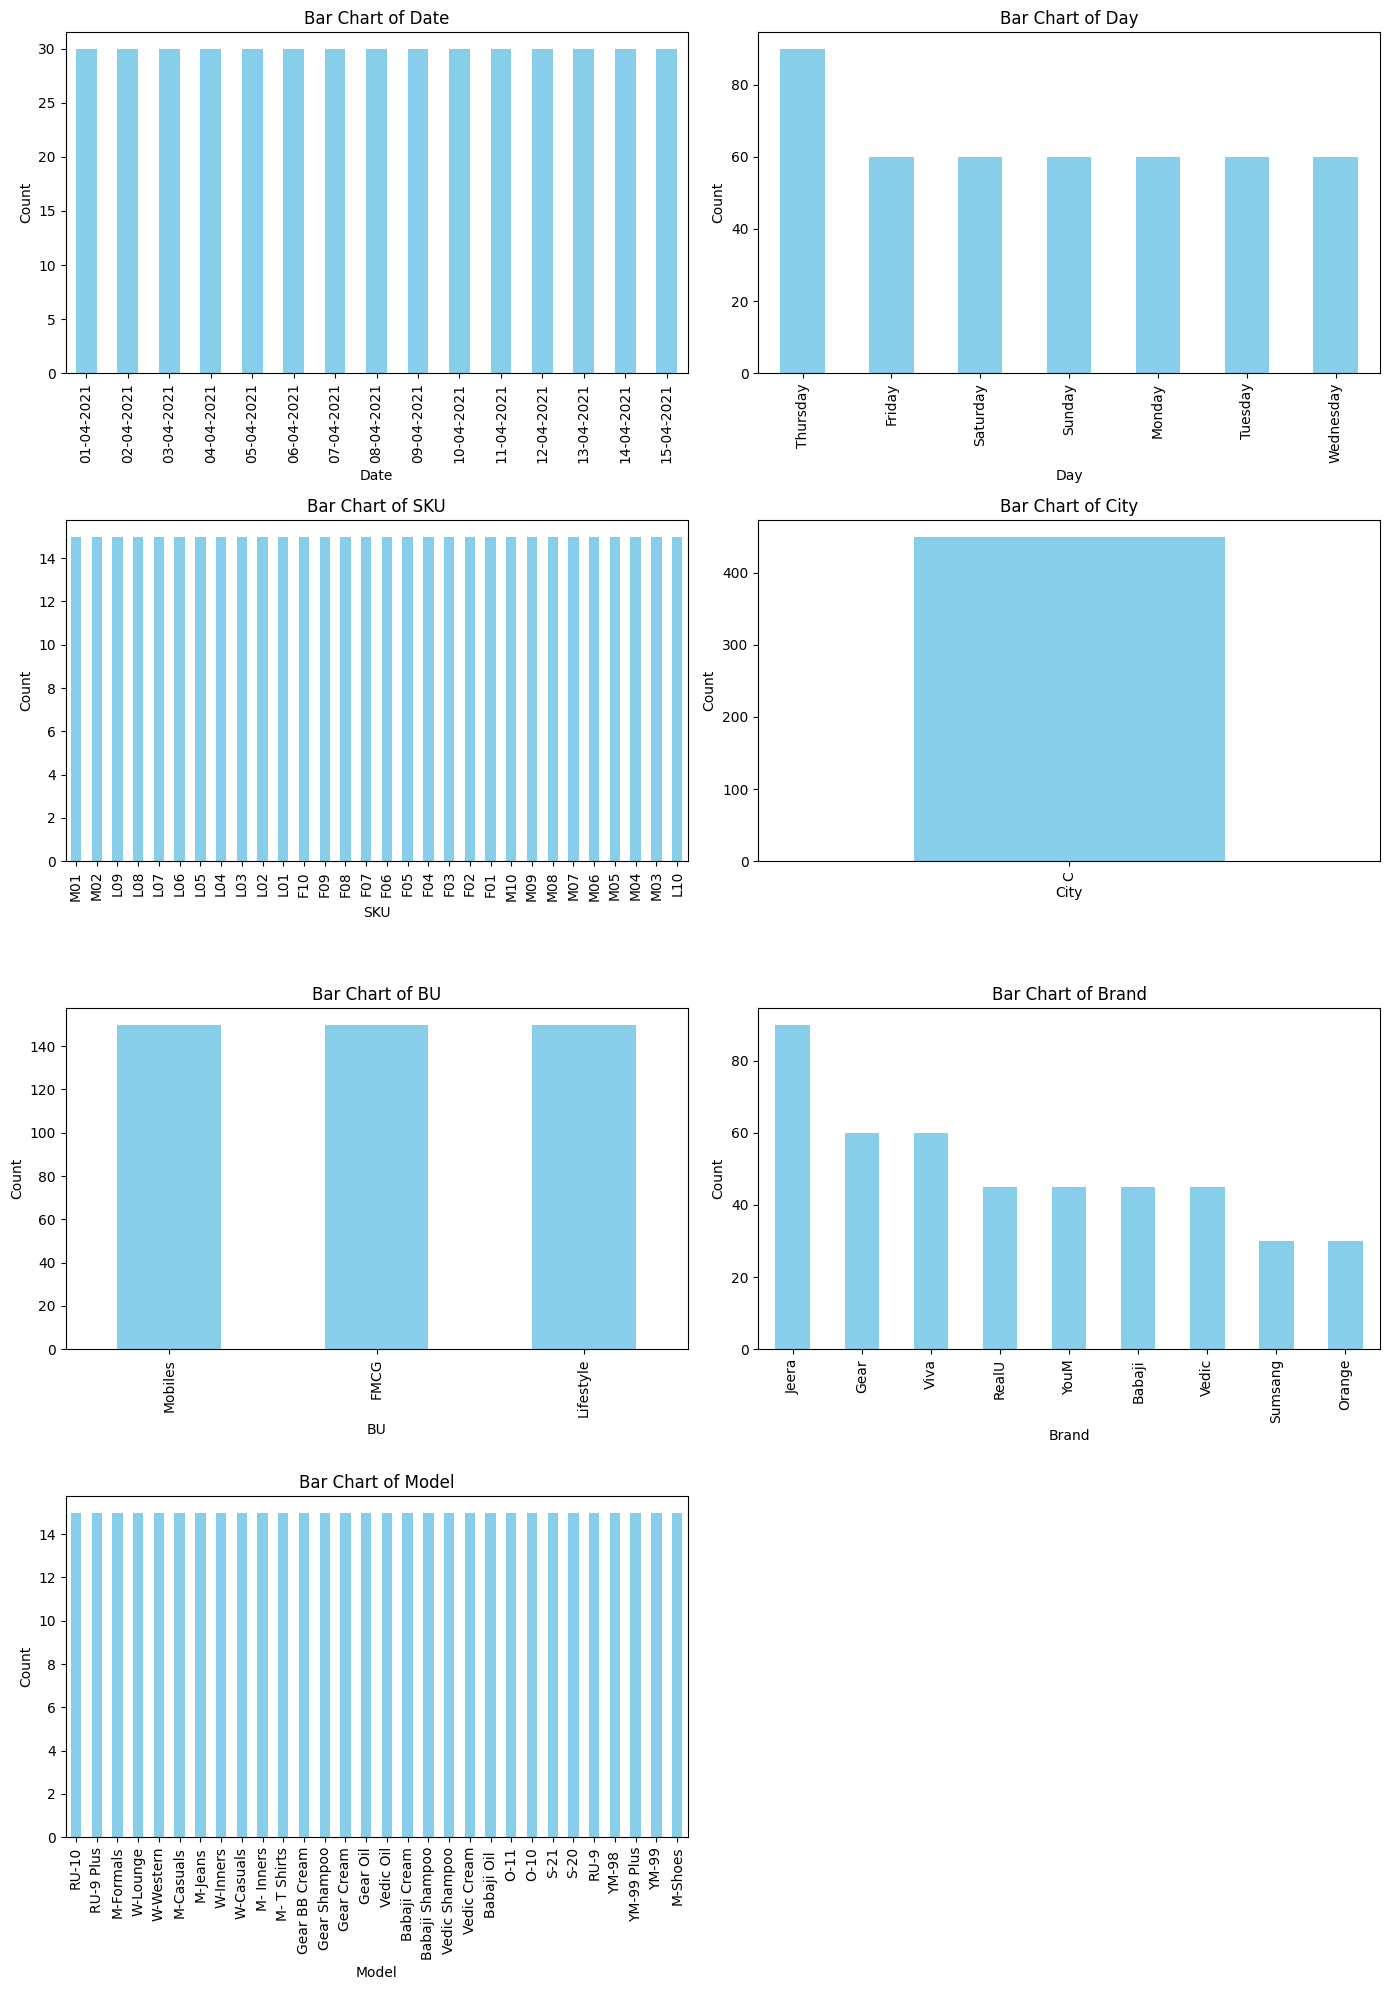

In [38]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Plot bar charts for categorical columns
# Step 1: Calculate the number of rows and columns for the subplots
n_cols = len(categorical_columns)  # Total number of columns
n_rows = math.ceil(n_cols / 2)  # Rows needed for 2 columns per row

# Step 2: Create a grid of subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))  # (rows, columns), adjust figure size

# Step 3: Flatten the axes for easy indexing
axes = axes.flatten()

# Step 4: Loop through categorical columns and plot bar charts
for i, col in enumerate(categorical_columns):
    data[col].value_counts().plot(kind='bar', color='skyblue', ax=axes[i])  # Plot bar chart
    axes[i].set_title(f"Bar Chart of {col}")  # Add title
    axes[i].set_xlabel(col)  # Add X-axis label
    axes[i].set_ylabel('Count')  # Add Y-axis label

# Step 5: Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplot slots

# Step 6: Adjust layout and show the plot
plt.tight_layout()  # Prevent overlap
plt.show()



Before Standardization:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146    

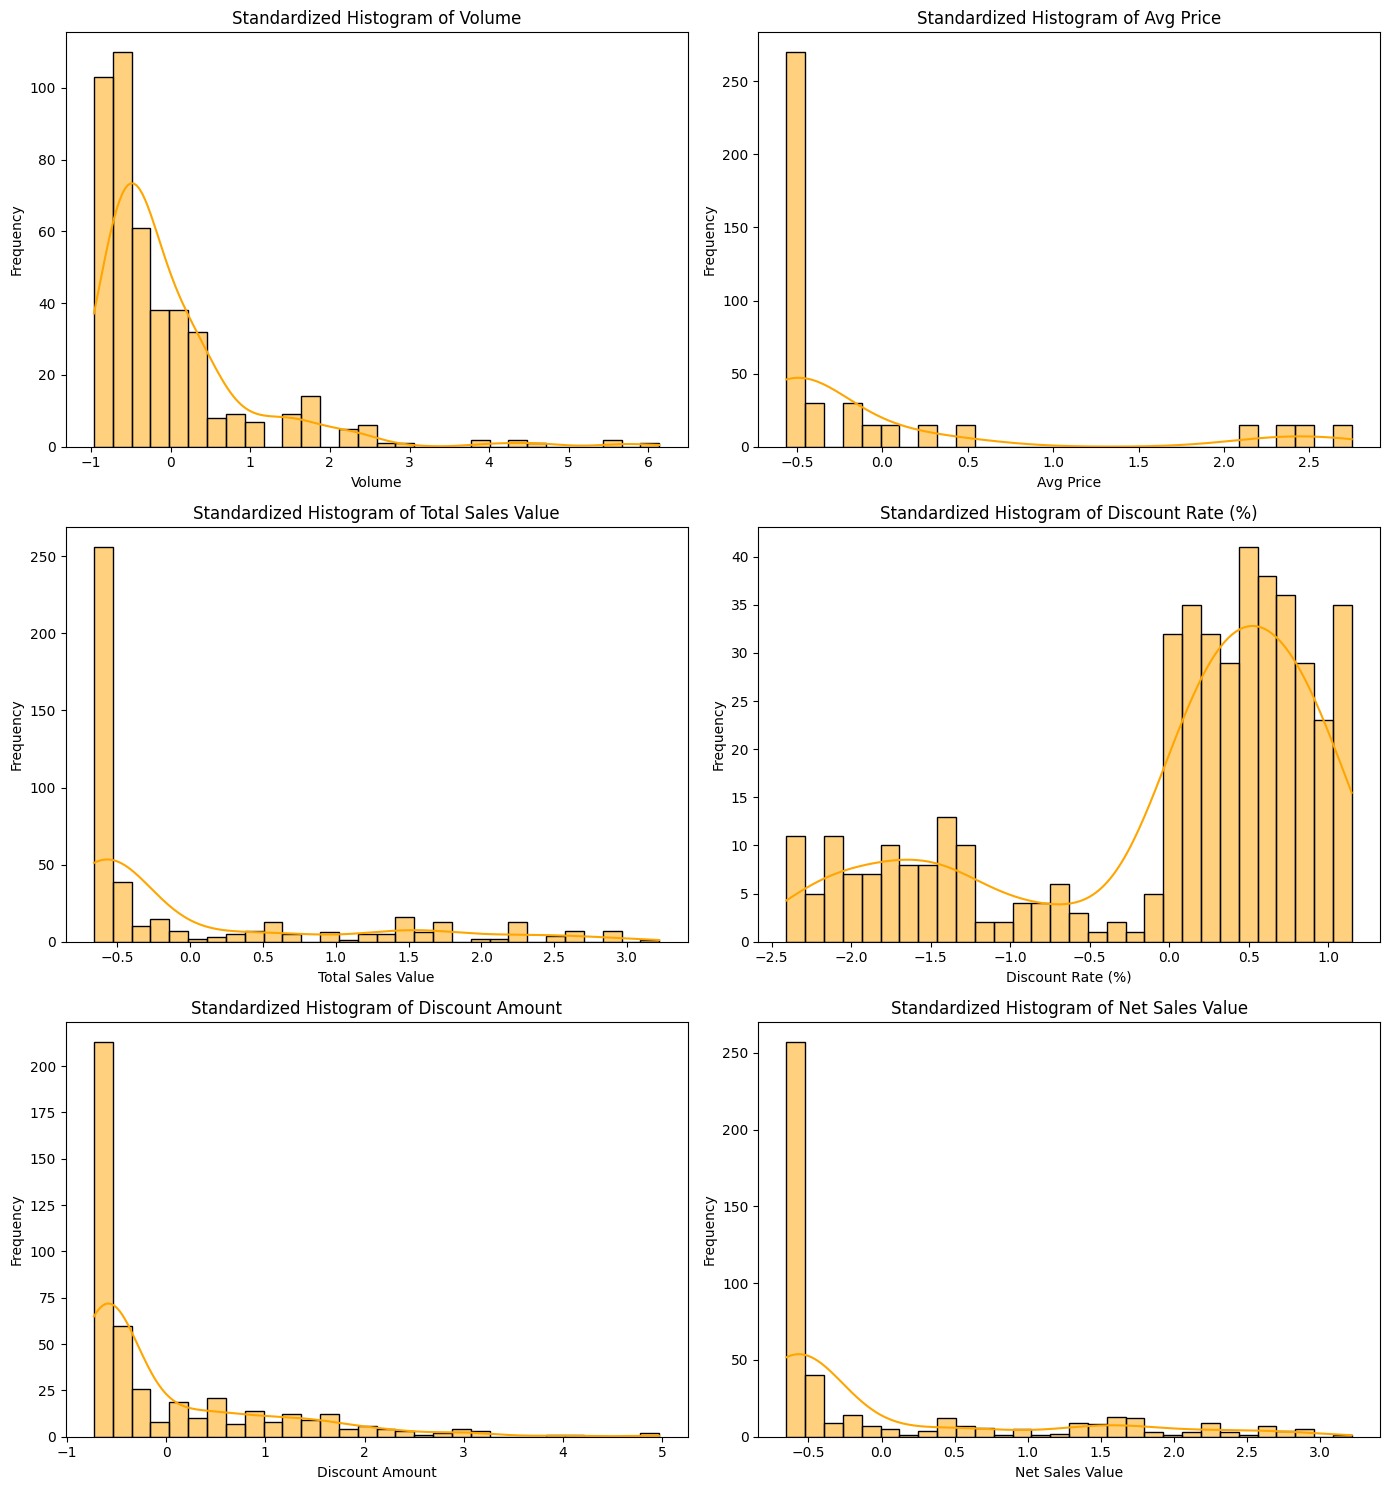

In [39]:
# Standardize numerical columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

# Convert to DataFrame for comparison
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_columns)

# Before and after comparison
print("\nBefore Standardization:")
print(data[numerical_columns].head())

print("\nAfter Standardization:")
print(data_scaled_df.head())

# Step 1: Calculate the number of rows and columns for the subplots
n_cols = len(numerical_columns)  # Total number of numerical columns
n_rows = math.ceil(n_cols / 2)  # Rows needed for 2 columns per row

# Step 2: Create a grid of subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))  # (rows, columns), adjust figure size

# Step 3: Flatten the axes for easy indexing
axes = axes.flatten()

# Step 4: Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_columns):
    sns.histplot(data_scaled_df[col], kde=True, bins=30, color='orange', ax=axes[i])  # Plot histogram
    axes[i].set_title(f"Standardized Histogram of {col}")  # Add title
    axes[i].set_xlabel(col)  # Add X-axis label
    axes[i].set_ylabel('Frequency')  # Add Y-axis label

# Step 5: Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplot slots

# Step 6: Adjust layout and show the plot
plt.tight_layout()  # Prevent overlap
plt.show()

In [40]:
# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Ensure the one-hot encoded columns are in integer format (0 and 1)
data_encoded = data_encoded.astype(int)

# Display a portion of the transformed dataset
print("\nDataset After One-Hot Encoding (with 0 and 1):")
print(data_encoded.head())

# Save the processed dataset
data_encoded.to_csv('processed_sales_data.csv', index=False)
print("Processed dataset saved as 'processed_sales_data.csv'.")



Dataset After One-Hot Encoding (with 0 and 1):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500                 11            21153   
1      10      10100             101000                 11            11676   
2       7      16100             112700                  9            10657   
3       6      20100             120600                  6             8364   
4       3       8100              24300                 17             4372   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0           160346                1                0                0   
1            89323                1                0                0   
2           102042                1                0                0   
3           112235                1                0                0   
4            19927                1                0                0   

   Date_04-04-2021  ...  Model_Vedic C